In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
sns.set(style="ticks")

In [2]:
# Будем анализировать данные только на обучающей выборке
sklearn_iris = load_iris()
data = pd.DataFrame(data= np.c_[sklearn_iris['data'], sklearn_iris['target']],
                     columns= sklearn_iris['feature_names'] + ['target'])

<br>
<b>Основные характеристики датасета:</b>

In [3]:
# Первые 5 строк датасета
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# Размер датасета
data.shape

(150, 5)

In [5]:
# Список столбцов
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
# Список столбцов с типами данных
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [7]:
# Проверим наличие пустых значений
for c in data.columns:
    na_cnt = data[data[c].isna()].shape[0]
    print('{} - {}'.format(c, na_cnt))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [8]:
# Описательная статистика
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<br>
<b>Визуальное исследование датасета:</b>

In [9]:
# Подготовим данные для дальнейшего исследования
data.rename(columns = {'sepal length (cm)':'sepal_length', 'sepal width (cm)':'sepal_width'}, inplace = True)
data.rename(columns = {'petal length (cm)':'petal_length', 'petal width (cm)':'petal_width'}, inplace = True)

Построим диаграмму рассеивания для колонок sepal lenght и sepal width

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

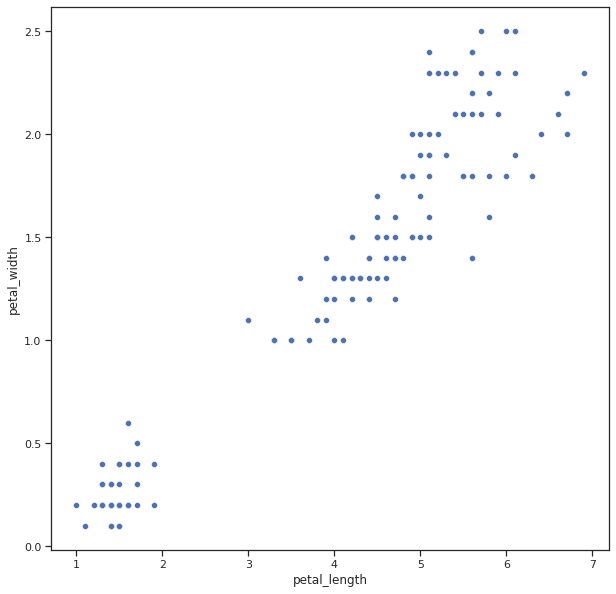

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='petal_length', y='petal_width', data=data)

Получили практически линейную зависимость двух показателей

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

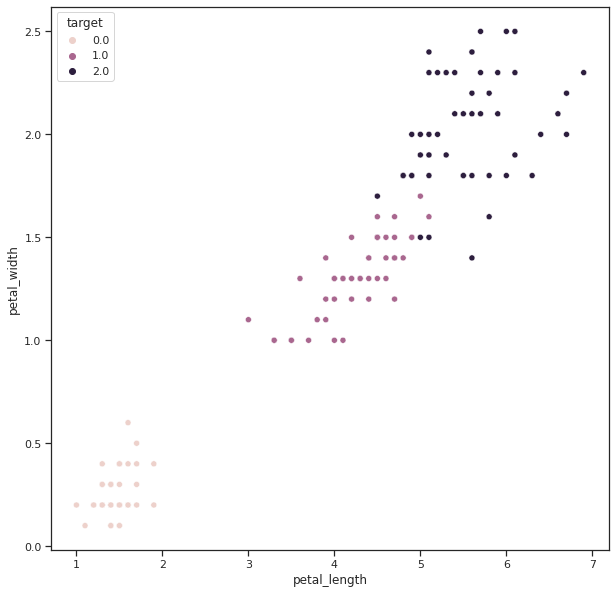

In [11]:
# Проверим, влиет ли целевой признак на зависимость -> влияет
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='petal_length', y='petal_width', data=data, hue="target")

Построим гистограмму, чтобы оценить плотность распределения данных столбца sepal_width

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

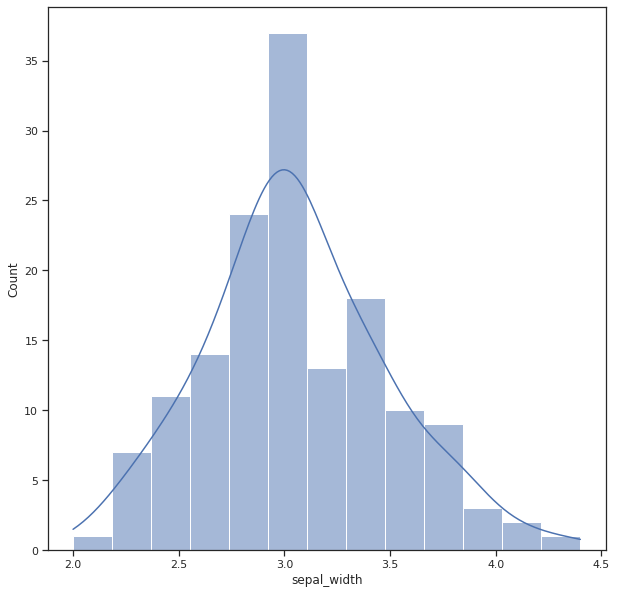

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data['sepal_width'], kde=True)

Построим комбинацию гистограмм и диаграммы рассеивания

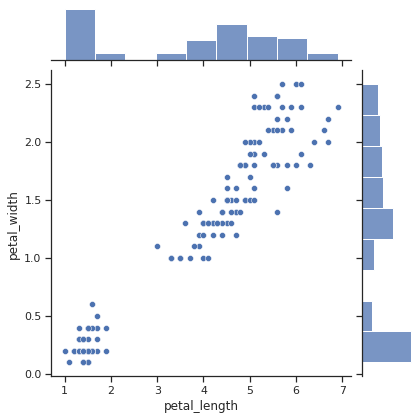

In [13]:
sns.jointplot(x='petal_length', y='petal_width', data=data)

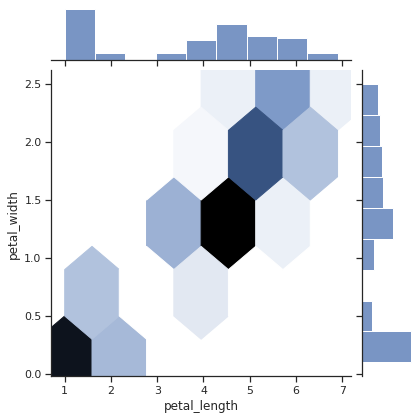

In [14]:
sns.jointplot(x='petal_length', y='petal_width', data=data, kind="hex")

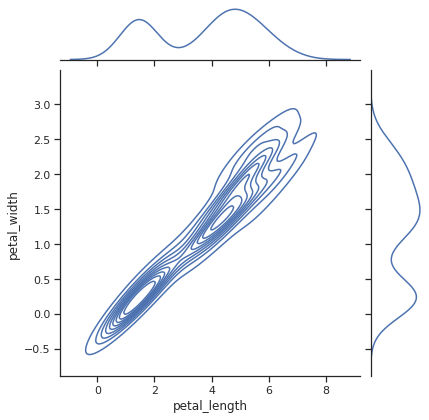

In [15]:
sns.jointplot(x='petal_length', y='petal_width', data=data, kind="kde")

Посмотроим комбинацию гистограмм и диаграмм рассеивания для всего набора данных

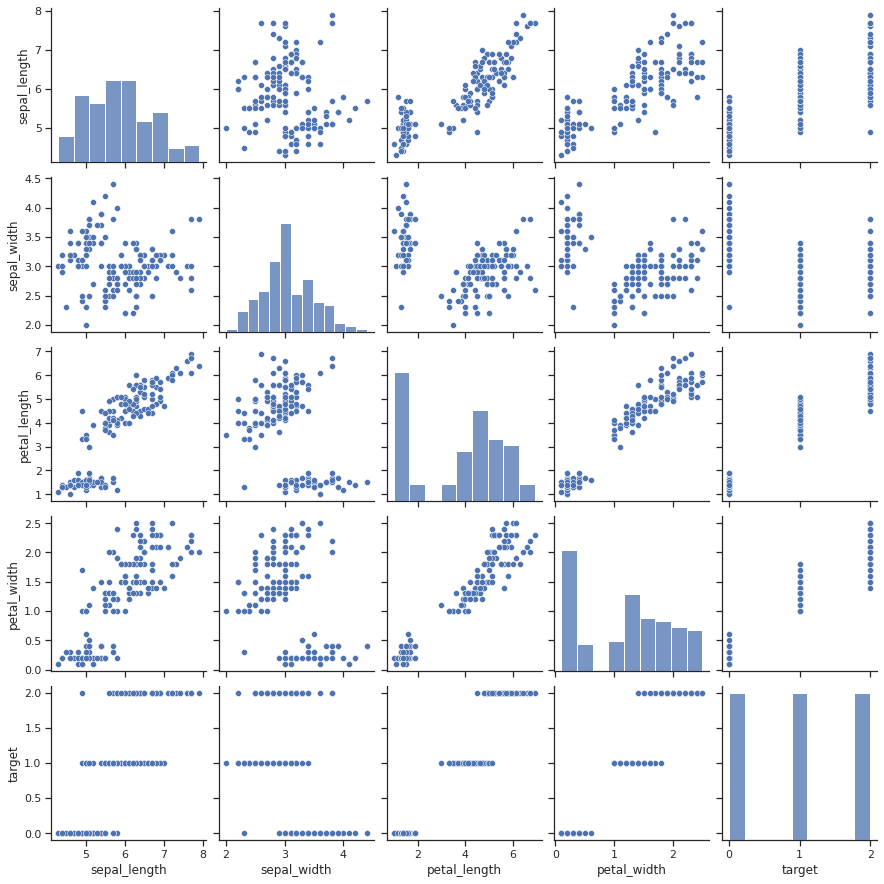

In [16]:
sns.pairplot(data)

<AxesSubplot:xlabel='sepal_width'>

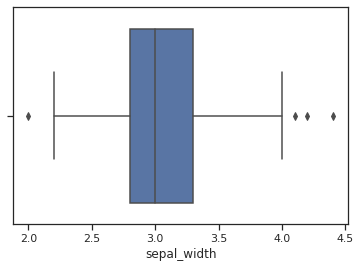

In [17]:
# Одномерное распределение вероятности
sns.boxplot(x=data['sepal_width'])

Построим распределение параметра target, сгруппированного по признаку petal_width

<AxesSubplot:xlabel='target', ylabel='petal_width'>

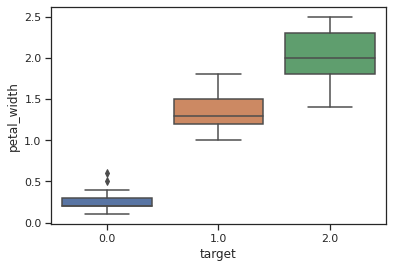

In [18]:
sns.boxplot(x='target', y='petal_width', data=data)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

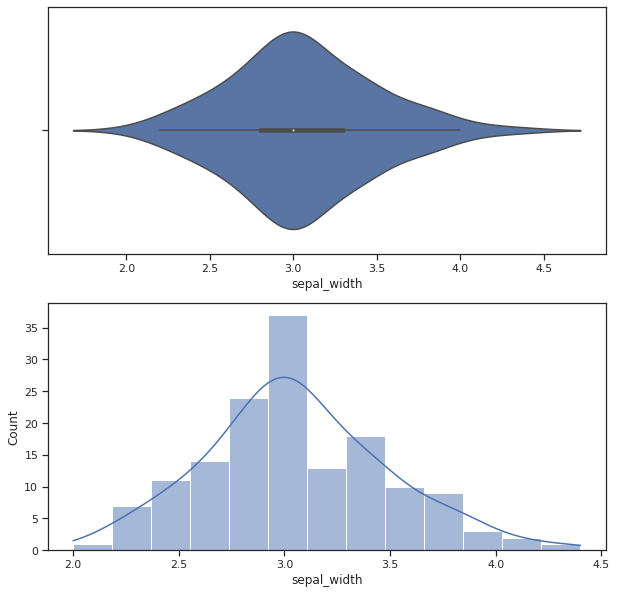

In [19]:
# Распределение параметра S1 с отображением плотности по краям
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['sepal_width'])
sns.histplot(data['sepal_width'], ax=ax[1], kde=True)

<br>
<b>Корреляция признаков</b>

In [20]:
# Корреляционная матрица
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Можно заметить сильную корреляцию между целевым признаком target и параметрами petal_length и petal_width (и немного слабее с параметром sepal_length). Помимо этого, все параметры достаточно коррелируют относительно друг друга, кроме sepal_width - со всеми остальными параметрами у него отрицательная корреляция.

Посмотрим на тепловую карту для визуализации корреляционной матрицы

<AxesSubplot:>

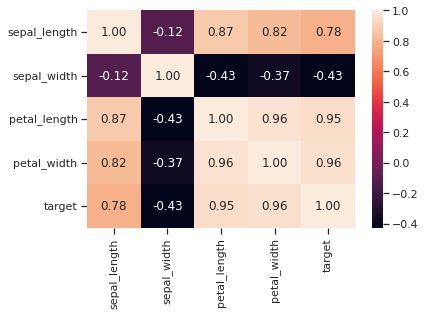

In [21]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

На тепловой карте еще больше заметна хорошая корреляция всех параметров, кроме sepal_width.

Построим корреляционные матрицы другими методами

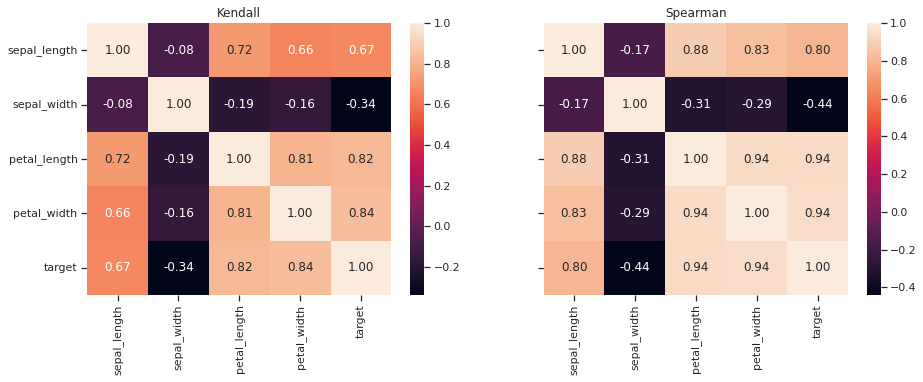

In [22]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='kendall'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[1], annot=True, fmt='.2f')
ax[0].title.set_text('Kendall')
ax[1].title.set_text('Spearman')